[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

1.0

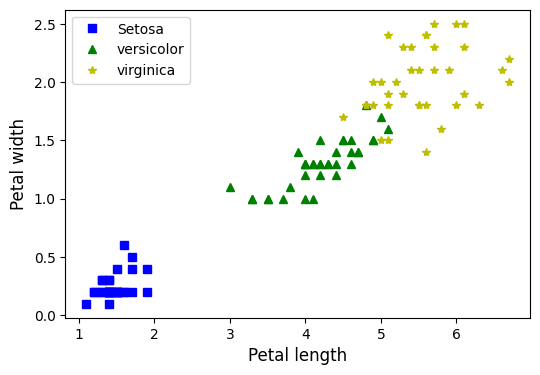

In [1]:
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as pit
import pandas as pd
import numpy as np

pd.set_option('display.max_columns',None,'max_colwidth',None,'display.expand_frame_repr',False)
# Print all columns in full, prevents line breaks

'#Get data'

iris = datasets.load_iris()

print(iris.data) # Show the data
print(iris.target) 
# Splitting the data into ip & op
X = iris.data # Input
y = iris.target # Output

n = X.shape[0] # Number of data points
print(n)

# Splitting the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# With random_state=42 (or any fixed integer):
    # The data is shuffled using the same seed (42 in this case) every time.
    # This ensures that you get the same training and testing sets every time you run the code, 
    # regardless of how many times you execute it.

'#Exploratory Data Analysis'

#print(iris.DESCR) # Refers to the description attribute like
# 1. Dataset characteristics, 2. Attribute information
# 3. Class descriptions, 4. Missing attribute values
# 5. Creators, 6. Dataset source

pit.figure(figsize=(6,4))
pit.plot(X_train[y_train==0,2], X_train[y_train==0,3], 'bs') 
pit.plot(X_train[y_train==1,2], X_train[y_train==1,3], 'g^')
pit.plot(X_train[y_train==2,2], X_train[y_train==2,3], 'y*')

pit.xlabel('Petal length', fontsize = 12)
pit.ylabel('Petal width', fontsize = 12)

pit.legend(['Setosa','versicolor','virginica'])

'#Data Preprocessing'

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

'#Data Modelling'

clf = svm.SVC() # Specifying a classification model of support vector machine

clf.fit(X_train_scaled, y_train) # Train classifier on training set data

'#Model Evaluation'

y_pred = clf.predict(X_test_scaled) # Using trained data to predict iris types of test data
print(y_pred)

accuracy_score(y_test,y_pred) # Calculate prediction accuracy